# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_raw['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [5]:
sinasc_raw_lat = pd.cut(sinasc_raw['munResLat'],[-13.49,-10.5,-8.76])
sinasc_raw.pivot_table(values=['IDADEMAE','IDADEPAI','ESTCIVMAE'],index=sinasc_raw_lat,aggfunc={'mean','min','sum','max','std','median'})


ESTCIVMAE                                          IDADEMAE  \
                      max      mean median  min       std      sum      max   
munResLat                                                                     
(-13.49, -10.5]       9.0  2.508555    2.0  1.0  1.624233  32107.0       53   
(-10.5, -8.76]        9.0  2.583689    2.0  1.0  1.715163  35735.0       52   

                                                        IDADEPAI             \
                      mean median min       std     sum      max       mean   
munResLat                                                                     
(-13.49, -10.5]  26.179819   26.0  12  6.321275  338060     86.0  30.899938   
(-10.5, -8.76]   26.014964   25.0  11  6.447663  365094     73.0  32.126689   

                                                  
                median   min       std       sum  
munResLat                                         
(-13.49, -10.5]   30.0  15.0  7.705610  198254.0  
(-10.5, -8.76]    31.0  16.0  8.034214   38038.0

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
sinasc_raw['munResArea'].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [7]:
sinasc_raw_area = pd.cut(sinasc_raw['munResArea'],[459.97,3000.00,34096.39])
sinasc_raw.pivot_table(values=['QTDFILVIVO','QTDFILMORT','KOTELCHUCK'],index=sinasc_raw_area,aggfunc={'mean','min','sum','max','std','median'})


KOTELCHUCK                                        \
                          max      mean median min       std    sum   
munResArea                                                            
(459.97, 3000.0]            9  4.693236    5.0   1  1.456135  24494   
(3000.0, 34096.39]          9  4.767482    5.0   1  1.714300  63746   

                   QTDFILMORT                                          \
                          max      mean median  min       std     sum   
munResArea                                                              
(459.97, 3000.0]          4.0  0.244803    0.0  0.0  0.551215  1260.0   
(3000.0, 34096.39]       28.0  0.251161    0.0  0.0  0.619323  3192.0   

                   QTDFILVIVO                                           
                          max      mean median  min       std      sum  
munResArea                                                              
(459.97, 3000.0]         30.0  0.924284    1.0  0.0  1.075442   4773.0  
(3000.0, 34096.39]       14.0  1.041554    1.0  0.0  1.171579  13510.0

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [9]:
sinasc_raw_alt = pd.cut(sinasc_raw['munResAlt'],[85.00,300.00,595.00])
sinasc_raw.pivot_table(values=['munResLon','munResArea','munResLat'],index=sinasc_raw_alt,aggfunc={'mean','min','sum','max','std','median'})

munResArea                                                   \
                      max          mean     median       min           std   
munResAlt                                                                    
(85.0, 300.0]   34096.394  15386.806708   6896.648   459.978  14282.870636   
(300.0, 595.0]  11518.915   9111.098928  11518.915  1451.060   3472.047228   

                             munResLat                                 \
                         sum       max       mean    median       min   
munResAlt                                                               
(85.0, 300.0]   3.724069e+08  -8.76889 -10.171209 -10.26310 -13.49976   
(300.0, 595.0]  2.265930e+07 -11.93554 -12.606178 -12.74137 -13.13056   

                                       munResLon                       \
                     std           sum       max       mean    median   
munResAlt                                                               
(85.0, 300.0]   1.226676 -246173.76034 -60.54431 -62.962756 -63.03327   
(300.0, 595.0]  0.340376  -31351.56352 -60.13858 -60.604960 -60.13858   

                                                  
                     min       std           sum  
munResAlt                                         
(85.0, 300.0]  -65.32915  1.102139 -1.523888e+06  
(300.0, 595.0] -61.99982  0.727188 -1.507245e+05

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


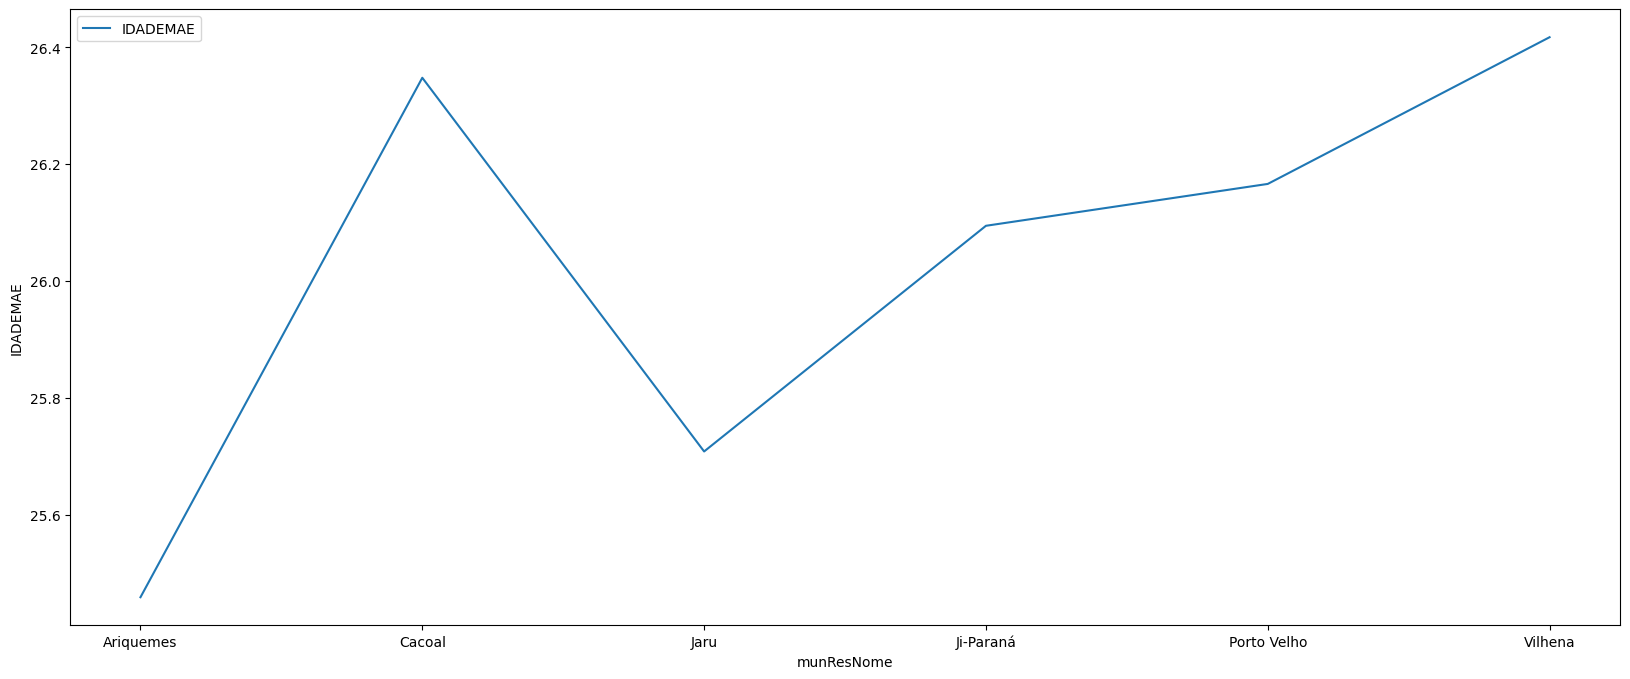

In [10]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

data_map = sinasc_raw[['munResNome','IDADEMAE']]
data_map = data_map.set_index('munResNome')
data_map = data_map.groupby(imediatas)['IDADEMAE'].mean().to_frame()
data_map.plot(figsize=(20,8))
plt.ylabel('IDADEMAE');


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [11]:
idh = {
    'Porto Velho':'IDH-M alto',
    'Vilhena':'IDH-M alto',
    'Cacoal':'IDH-M alto',
    'Ji-Paraná':'IDH-M alto',
    'Pimenta Bueno':'IDH-M alto',
    'Ariquemes':'IDH-M alto',
    'Rolim de Moura':'IDH-M alto',
    'Cerejeiras':'IDH-M médio',
    'Jaru':'IDH-M médio',
    'Colorado do Oeste':'IDH-M médio',
    'Ouro Preto do Oeste':'IDH-M médio',
    'Espigão d"Oeste':'IDH-M médio',
    'Santa Luzia d"Oeste':'IDH-M médio',
    'Pimenteiras do Oeste':'IDH-M médio',
    'Presidente Médici':'IDH-M médio',
    'Castanheiras':'IDH-M médio',
    'Guajará-Mirim':'IDH-M médio',
    'Chupinguaia':'IDH-M médio',
    'Cabixi':'IDH-M médio',
    'Candeias do Jamari':'IDH-M médio',
    'São Felipe d"Oeste':'IDH-M médio',
    'Cacaulândia':'IDH-M médio',
    'São Miguel do Guaporé':'IDH-M médio',
    'Mirante da Serra':'IDH-M médio',
    'Alvorada d"Oeste':'IDH-M médio',
    'Teixeirópolis':'IDH-M médio',
    'Nova Brasilândia d"Oeste':'IDH-M médio',
    'Rio Crespo':'IDH-M médio',
    'Primavera de Rondônia':'IDH-M médio',
    'Alta Floresta d"Oeste':'IDH-M médio',
    'Ministro Andreazza':'IDH-M médio',
    'Novo Horizonte do Oeste':'IDH-M médio',
    'Vale do Paraíso':'IDH-M médio',
    'Alto Paraíso':'IDH-M médio',
    'Parecis':'IDH-M médio',
    'Buritis':'IDH-M médio',
    'Itapuã do Oeste':'IDH-M médio',
    'Corumbiara':'IDH-M médio',
    'Cujubim':'IDH-M médio',
    'Costa Marques':'IDH-M médio',
    'São Francisco do Guaporé':'IDH-M médio',
    'Urupá':'IDH-M médio',
    'Monte Negro':'IDH-M médio',
    'Seringueiras':'IDH-M baixo',
    'Governador Jorge Teixeira':'IDH-M baixo',
    'Machadinho d"Oeste':'IDH-M baixo',
    'Campo Novo de Rondônia':'IDH-M baixo',
    'Alto Alegre dos Parecis':'IDH-M baixo',
    'Theobroma':'IDH-M baixo',
    'Nova União':'IDH-M baixo',
    'Nova Mamoré':'IDH-M baixo',
    'Vale do Anari':'IDH-M baixo',
}
data_idh = sinasc_raw
data_idh = data_idh.set_index('munResNome')
data_idh.groupby(idh)['IDADEMAE'].mean()

munResNome
IDH-M alto     26.280332
IDH-M baixo    25.269231
IDH-M médio    25.848191
Name: IDADEMAE, dtype: float64

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [12]:
ifdm = {
    'Ariquemes':'Desenvolvimento moderado',
    'Vilhena':'Desenvolvimento moderado',
    'Pimenta Bueno':'Desenvolvimento moderado',
    'Porto Velho':'Desenvolvimento moderado',
    'Ji-Paraná':'Desenvolvimento moderado',
    'Cacoal':'Desenvolvimento moderado',
    'Santa Luzia d"Oeste':'Desenvolvimento moderado',
    'Rolim de Moura':'Desenvolvimento moderado',
    'Chupinguaia':'Desenvolvimento moderado',
    'São Miguel do Guaporé':'Desenvolvimento moderado',
    'Pimenteiras do Oeste':'Desenvolvimento moderado',
    'Teixeirópolis':'Desenvolvimento moderado',
    'Colorado do Oeste':'Desenvolvimento moderado',
    'Jaru':'Desenvolvimento moderado',
    'Rio Crespo':'Desenvolvimento moderado',
    'Primavera de Rondônia':'Desenvolvimento moderado',
    'Alta Floresta d"Oeste':'Desenvolvimento moderado',
    'Ouro Preto do Oeste':'Desenvolvimento moderado',
    'São Francisco do Guaporé':'Desenvolvimento moderado',
    'Candeias do Jamari':'Desenvolvimento moderado',
    'Buritis':'Desenvolvimento moderado',
    'São Felipe d"Oeste':'Desenvolvimento moderado',
    'Presidente Médici':'Desenvolvimento moderado',
    'Cerejeiras':'Desenvolvimento moderado',
    'Monte Negro':'Desenvolvimento moderado',
    'Urupá':'Desenvolvimento moderado',
    'Espigão d"Oeste':'Desenvolvimento regular',
    'Seringueiras':'Desenvolvimento regular',
    'Alvorada d"Oeste':'Desenvolvimento regular',
    'Itapuã do Oeste':'Desenvolvimento regular',
    'Cabixi':'Desenvolvimento regular',
    'Novo Horizonte do Oeste':'Desenvolvimento regular',
    'Nova Brasilândia d"Oeste':'Desenvolvimento regular',
    'Vale do Paraíso':'Desenvolvimento regular',
    'Corumbiara':'Desenvolvimento regular',
    'Alto Paraíso':'Desenvolvimento regular',
    'Cacaulândia':'Desenvolvimento regular',
    'Vale do Anari':'Desenvolvimento regular',
    'Ministro Andreazza':'Desenvolvimento regular',
    'Costa Marques':'Desenvolvimento regular',
    'Nova União':'Desenvolvimento regular',
    'Guajará-Mirim':'Desenvolvimento regular',
    'Mirante da Serra':'Desenvolvimento regular',
    'Parecis':'Desenvolvimento regular',
    'Castanheiras':'Desenvolvimento regular',
    'Theobroma':'Desenvolvimento regular',
    'Machadinho d"Oeste':'Desenvolvimento regular',
    'Campo Novo de Rondônia':'Desenvolvimento regular',
    'Nova Mamoré':'Desenvolvimento regular',
    'Cujubim':'Desenvolvimento regular',
    'Alto Alegre dos Parecis':'Desenvolvimento regular',
    'Governador Jorge Teixeira':'Desenvolvimento regular',
}
data_ifmd = sinasc_raw
data_ifmd = data_ifmd.set_index('munResNome')
data_ifmd = data_ifmd.groupby(ifdm)
data_ifmd['IDADEPAI'].sum().to_frame()

,IDADEPAI
munResNome,
Desenvolvimento moderado,179957.0
Desenvolvimento regular,25327.0


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [13]:
pib = {
    'Porto Velho':'Acima de 1 Bilhão',
    'Ji-Paraná':'Acima de 1 Bilhão',
    'Vilhena':'Acima de 1 Bilhão',
    'Ariquemes':'Acima de 1 Bilhão',
    'Cacoal':'Acima de 1 Bilhão',
    'Jaru':'Acima de 1 Bilhão',
    'Rolim de Moura':'Acima de 1 Bilhão',
    'Pimenta Bueno':'Acima de 1 Bilhão',
    'Guajará-Mirim':'Acima de 500 Milhões',
    'Ouro Preto do Oeste':'Acima de 500 Milhões',
    'Buritis':'Acima de 500 Milhões',
    'Machadinho do Oeste':'Acima de 500 Milhões',
    'Espigão d"Oeste':'Acima de 500 Milhões',
    'São Miguel do Guaporé':'Acima de 500 Milhões',
    'Candeias do Jamari':'Acima de 500 Milhões',
    'Nova Mamoré':'Acima de 500 Milhões',
    'Cerejeiras':'Acima de 500 Milhões',
    'Alta Floresta do Oeste':'Acima de 300 Milhões',
    'Presidente Médici':'Acima de 300 Milhões',
    'Cujubim':'Acima de 300 Milhões',
    'Nova Brasilândia do Oeste':'Acima de 300 Milhões',
    'Alto Paraíso':'Acima de 300 Milhões',
    'São Francisco do Guaporé':'Acima de 300 Milhões',
    'Colorado do Oeste':'Acima de 300 Milhões',
    'Monte Negro':'Acima de 200 Milhões',
    'Alto Alegre dos Parecis':'Acima de 200 Milhões',
    'Campo Novo de Rondônia':'Acima de 200 Milhões',
    'Alvorada do Oeste':'Acima de 200 Milhões',
    'Chupinguaia':'Acima de 100 Milhões',
    'Corumbiara':'Acima de 100 Milhões',
    'Ministro Andreazza':'Acima de 100 Milhões',
    'Urupá':'Acima de 100 Milhões',
    'Costa Marques':'Acima de 100 Milhões',
    'Seringueiras':'Acima de 100 Milhões',
    'Mirante da Serra':'Acima de 100 Milhões',
    'Governador Jorge Teixeira':'Acima de 100 Milhões',
    'Theobroma':'Acima de 100 Milhões',
    'Santa Luzia do Oeste':'Acima de 100 Milhões',
    'Novo Horizonte do Oeste':'Acima de 100 Milhões',
    'Itapuã do Oeste':'Acima de 100 Milhões',
    'Vale do Paraíso':'Acima de 100 Milhões',
    'Cacaulândia':'Acima de 100 Milhões',
    'Cabixi':'Acima de 100 Milhões',
    'Vale do Anari':'Acima de 100 Milhões',
    'Nova União':'Até 100 Milhões',
    'Parecis':'Até 100 Milhões',
    'Rio Crespo':'Até 100 Milhões',
    'Pimenteiras do Oeste':'Até 100 Milhões',
    'Teixeirópolis':'Até 100 Milhões',
    'São Felipe do Oeste':'Até 100 Milhões',
    'Castanheiras':'Até 100 Milhões',
    'Primavera de Rondônia':'Até 100 Milhões',
}
data_pib = sinasc_raw
data_pib = data_pib.set_index('munResNome')
data_pib = data_pib.groupby(pib)
data_pib[['IDADEPAI','IDADEMAE']].median()

,IDADEPAI,IDADEMAE
munResNome,,
Acima de 1 Bilhão,30.0,26.0
Acima de 100 Milhões,31.0,25.0
Acima de 200 Milhões,29.0,25.0
Acima de 300 Milhões,30.0,25.0
Acima de 500 Milhões,31.0,25.0
Até 100 Milhões,30.0,26.0
